In [60]:
import xarray as xr
import pandas as pd
import numpy as np
from forecasts import for_netcdf_encoding

In [61]:
ds = xr.open_dataset('/nobackup/users/straaten/EXT_extra/45r1/hin_2012-04-18_processed.nc')

#### Usable for swvl in and z300 above the target region

In [62]:
ds['swvl13'].loc[:,slice(51.5,48.5),slice(7.5,10.5),:] = 1
ds['swvl13'].loc[:,slice(48.5,47),slice(6,7.5),:] = 1
ds['swvl13'].loc[:,slice(50,48.5),slice(6,7.5),:] = 1

In [64]:
ds['swvl13'].loc[:,slice(47,42.5),slice(21,25.5),:] = 2
ds['swvl13'].loc[:,slice(47,45.5),slice(16.5,21),:] = 2
ds['swvl13'].loc[:,slice(44,44),slice(19.5,19.5),:] = 2

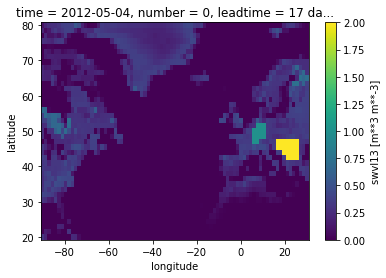

In [65]:
ds['swvl13'][16,:,:,0].plot()

In [66]:
temp = ds['swvl13'].where(ds['swvl13'] >=1, other = np.nan)[0,:,:,0]
temp.name = 'clustid'
temp = temp.drop(['time','number','leadtime'])
temp.attrs = {'units':''}
temp = temp.expand_dims('dissim_threshold')
temp = temp.assign_coords({'dissim_threshold':np.array([1], dtype = np.int64)}).sortby('latitude') # forecasts are differently indexed than observations

In [67]:
# cropping domain a bit to europe (ERA5 Land)
temp = temp.sel(latitude = slice(30,75), longitude = slice(-30,40)).to_dataset()

In [68]:
particular_encoding = {key : for_netcdf_encoding[key] for key in temp.variables.keys()}
temp.to_netcdf('/nobackup/users/straaten/clusters/swvl-simple.nc', encoding=particular_encoding)

#### Usable for SST

Osso (2020). northwestern box (42–52N, 52–40W) southeastern box
(35–42N, 35–20W).

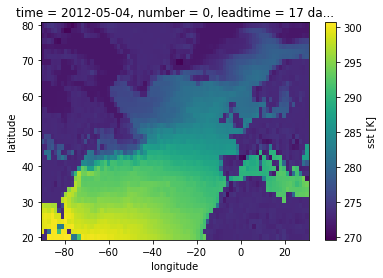

In [22]:
ds['sst'][16,:,:,0].plot()

In [31]:
ds['sst'].loc[:,slice(52,42),slice(-52,-40),:] = 0
ds['sst'].loc[:,slice(42,35),slice(-35,-20),:] = 1
ds['sst'].loc[:,slice(52,42),slice(-39,-26),:] = 2
ds['sst'].loc[:,slice(59,54.5),slice(1.5,4.5),:] = 3
ds['sst'].loc[:,slice(32,26),slice(-31,-20),:] = 4

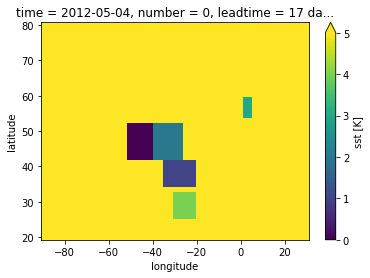

In [32]:
ds['sst'][16,:,:,0].plot(vmin = 0, vmax = 5)

In [33]:
temp = ds['sst'].where(ds['sst'] <= 5, other = np.nan)[0,:,:,0]
temp.name = 'clustid'
temp = temp.drop(['time','number','leadtime'])
temp.attrs = {'units':''}
temp = temp.expand_dims('dissim_threshold')
temp = temp.assign_coords({'dissim_threshold':np.array([1], dtype = np.int64)}).sortby('latitude').to_dataset() # forecasts are differently indexed than observations

In [34]:
particular_encoding = {key : for_netcdf_encoding[key] for key in temp.variables.keys()}
temp.to_netcdf('/nobackup/users/straaten/clusters/sst-simple.nc', encoding=particular_encoding)